In [1]:
import sys
sys.path.append('../')
import dft_descriptors.fragmentation as fg
import dft_descriptors.numbering_CO as nb
import dft_descriptors.prepocessing as pp

In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') 

In [3]:
df = pd.read_csv('../data_csv/Data_test10212021.csv', sep = ',')
df = df[df['Reactant Smile (C-O)'].notna()]

# C-O cleaning

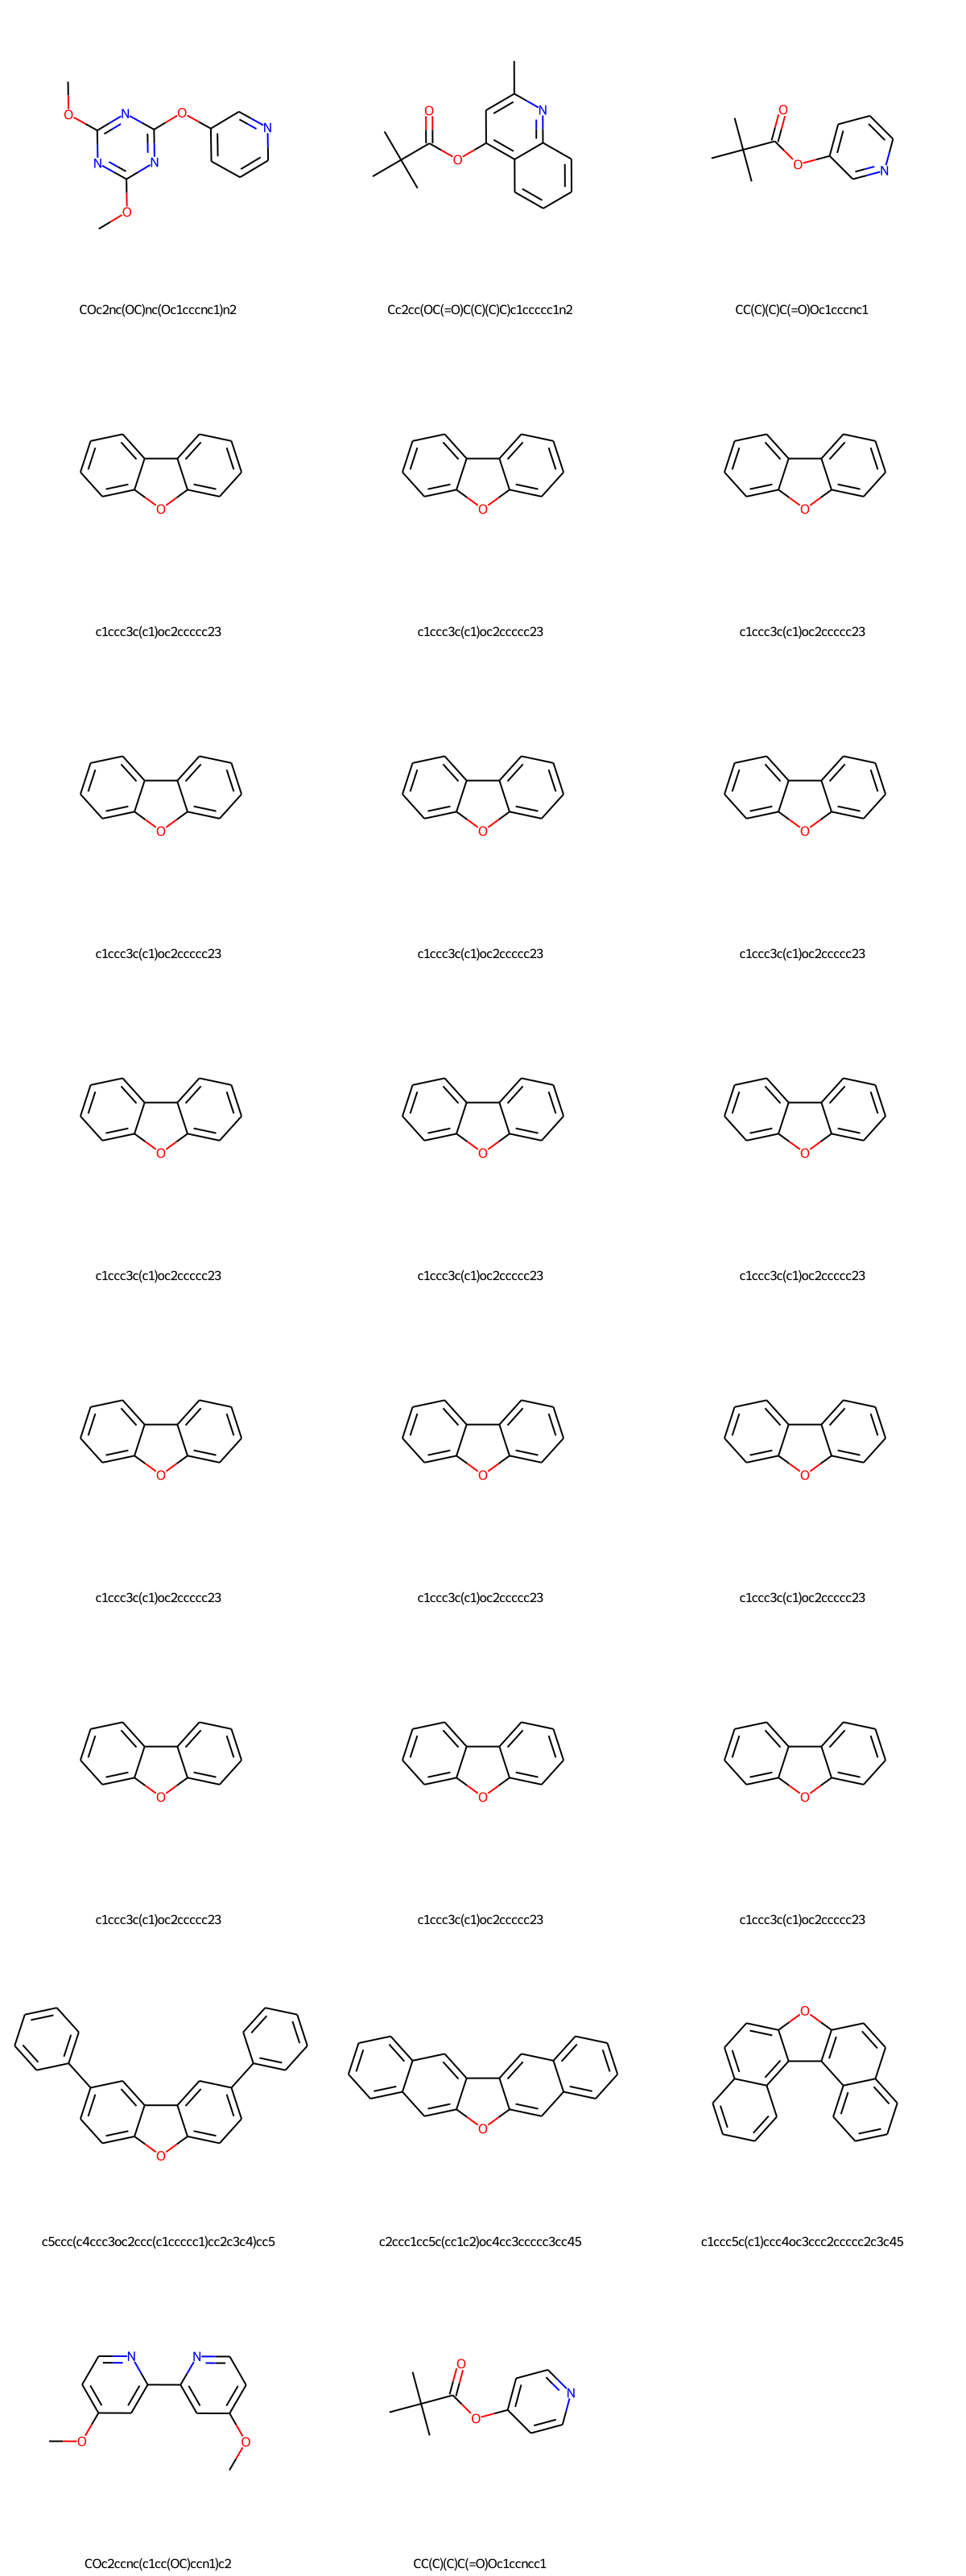

In [4]:
patt = Chem.MolFromSmiles('c1ccccc1O')
wrong_mol = []
wrong_smi = []
index = []

for i, smi in enumerate(df['Reactant Smile (C-O)']):
    try :
        m = Chem.MolFromSmiles(smi,sanitize=False)
        if m is None:
            print('invalid SMILES for index', i)
        else:
            try:
                Chem.SanitizeMol(m)
                if m.HasSubstructMatch(patt) == False:
                    wrong_mol.append(m)
                    wrong_smi.append(smi)
                    index.append(str(i))
            except:
                print('A. invalid chemistry for index ', i)
    except:
        print('B. invalid chemistry for index ', i)
    
Chem.Draw.MolsToGridImage(wrong_mol, legends = wrong_smi, maxMols = 200, subImgSize=(400, 400))

# A-X effectif cleaning

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 200. Change the maxMols value to display more.
  warnings.warn(


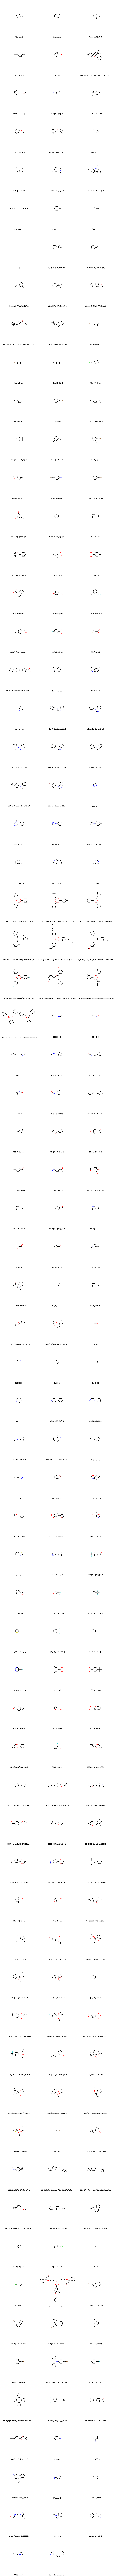

In [5]:
ax_unik_can = []
ax_unik_mol = []
data_smi = []
for smi in df["A-X effectif"]:
    smi_can = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
    if smi_can not in ax_unik_can:
        ax_unik_can.append(smi_can)
        ax_unik_mol.append(Chem.MolFromSmiles(smi_can))
        data_smi.append(smi)

Draw.MolsToGridImage(ax_unik_mol, legends = data_smi, maxMols = 200, subImgSize=(400, 400))

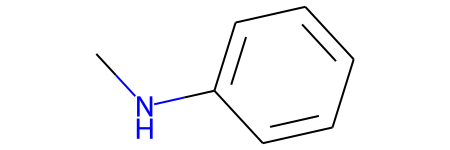

In [6]:
m = Chem.MolFromSmiles('CNc1ccccc1')
m

In [7]:
nb.show_DOIS(m, 'A-X effectif', df)


['https://doi.org/10.1021/op300236f']

In [8]:
nb.show_smiles(m, df)

['CNc1ccccc1']

# Ligand cleaning

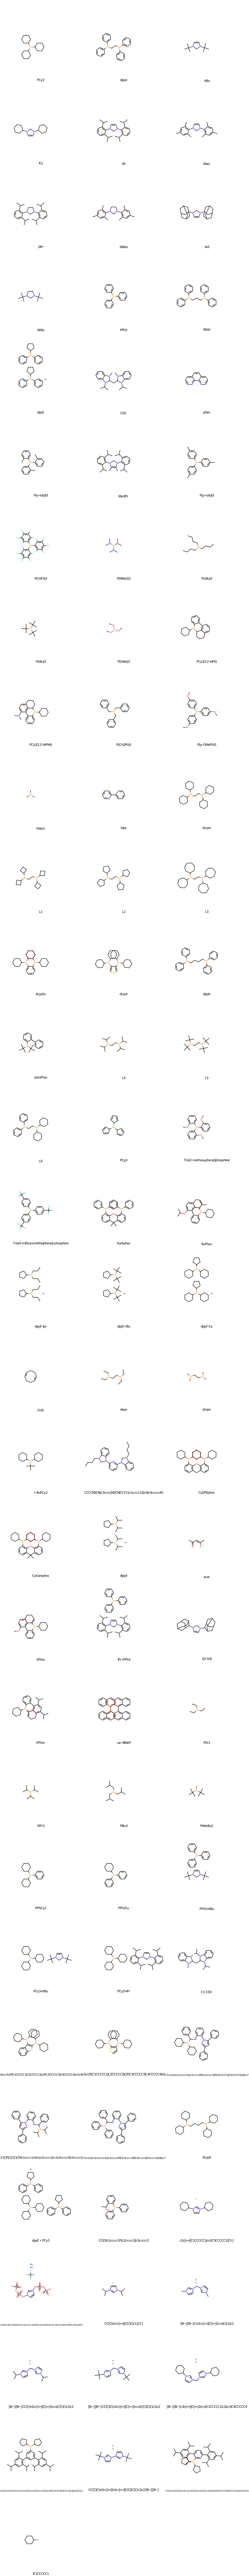

In [9]:
ax_unik_can = []
ax_unik_mol = []
data_smi = []
for smi in df["Ligand effectif"]:
    try:
        lig = pp.dict_ligand[smi]
        smi_can = Chem.MolToSmiles(Chem.MolFromSmiles(lig))
        if smi_can not in ax_unik_can:
            ax_unik_can.append(smi_can)
            ax_unik_mol.append(Chem.MolFromSmiles(smi_can))
            data_smi.append(smi)
    except:
        pass

Draw.MolsToGridImage(ax_unik_mol, legends = data_smi, maxMols = 200, subImgSize=(400, 400))

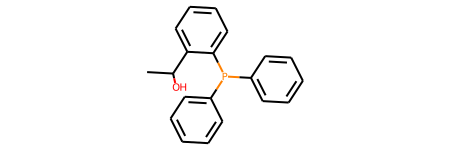

In [16]:
m = Chem.MolFromSmiles('CC(O)c1ccccc1P(c2ccccc2)c3ccccc3')
m

In [17]:
nb.show_smiles(m, df)

['CC(O)c1ccccc1P(c2ccccc2)c3ccccc3']